In [1]:
import pandas as pd
import numpy as np
import sklearn
import pycaret

In [2]:
data = pd.read_csv('./Data/bank-additional-full.csv', sep=';')
data.shape

(41188, 21)

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


<AxesSubplot:>

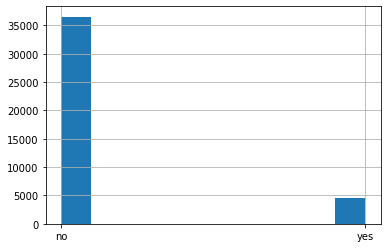

In [5]:
# data is somewhat imbalanced
data['y'].hist()

In [6]:
# take a look at non-numeric data
data.select_dtypes(exclude="number").head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [7]:
# look at nique values
# also, take a look at top-frequent data and their frequencey (how skew is each field)
data.describe(exclude="number")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [8]:
# how about numerical data?
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
# no duplicate values were detected
n_duplicates = data.duplicated().sum()
print(f"number of unique duplicates in database are {n_duplicates}")

number of unique duplicates in database are 12


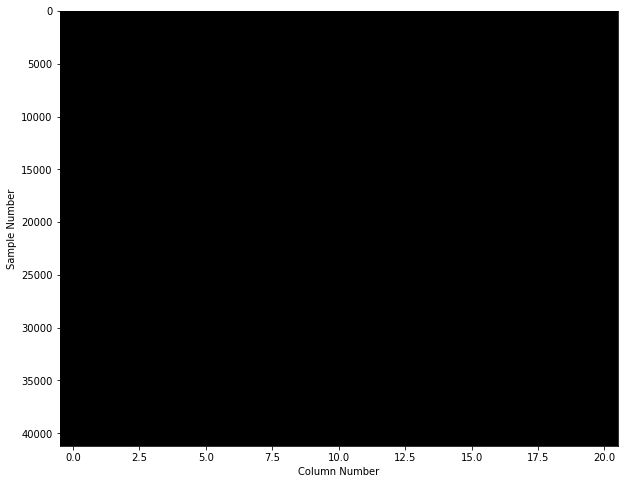

In [10]:
# check for missing values
# if there are any, we would have to find a reasoable way to replace or impute
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(data.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

In [11]:
# according to documentation of dataset, 'unknown' values are to be treated as missing values
# check how many aremissing for each categorical fied
cat_fields = list(data.select_dtypes(exclude="number"))
for i in cat_fields:
    print(f"number of 'unknwon' values for field {i} is: {len(np.where(data[i]=='unknown')[0])}")
    
# not a lot of missing values here, might have to combine with other categories or treat as separate
# field

number of 'unknwon' values for field job is: 330
number of 'unknwon' values for field marital is: 80
number of 'unknwon' values for field education is: 1731
number of 'unknwon' values for field default is: 8597
number of 'unknwon' values for field housing is: 990
number of 'unknwon' values for field loan is: 990
number of 'unknwon' values for field contact is: 0
number of 'unknwon' values for field month is: 0
number of 'unknwon' values for field day_of_week is: 0
number of 'unknwon' values for field poutcome is: 0
number of 'unknwon' values for field y is: 0


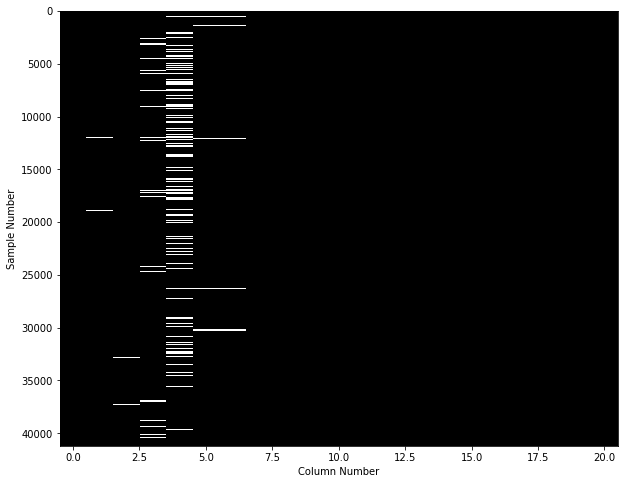

In [12]:
# visualize missing values
dataT = data.copy()
dataT = dataT.replace('unknown', np.nan)
plt.figure(figsize=(10, 8))
plt.imshow(dataT.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

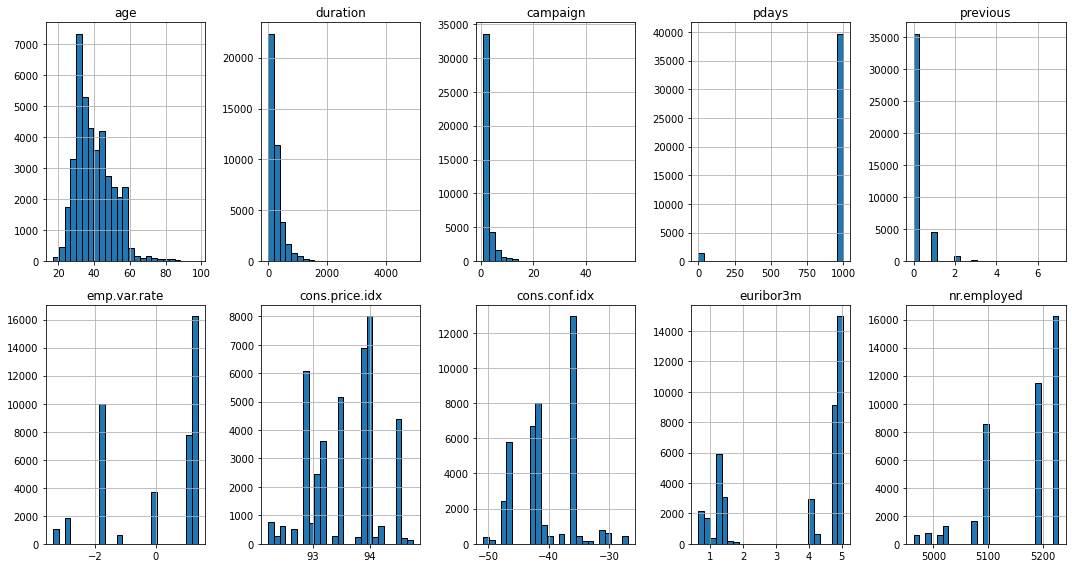

In [13]:
data.hist(bins=25, figsize=(15, 8), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

# looks like 'pdays' fields are not very useful as majority clients were contacted for the first time


{'whiskers': [<matplotlib.lines.Line2D at 0x20907048088>,
 'caps': [<matplotlib.lines.Line2D at 0x20907048748>,
 'boxes': [<matplotlib.lines.Line2D at 0x2090703fa88>,
 'medians': [<matplotlib.lines.Line2D at 0x209070500c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x2090701de08>,
 'means': []}

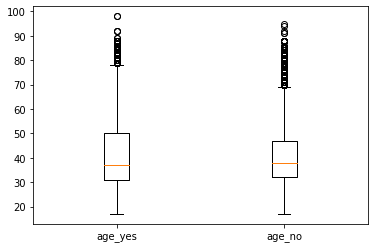

In [14]:
age_yes = data.loc[np.where(data['y']=='yes')[0],'age']
age_no = data.loc[np.where(data['y']=='no')[0],'age']

d = [age_yes, age_no]
plt.boxplot(d, labels = ['age_yes', 'age_no'])

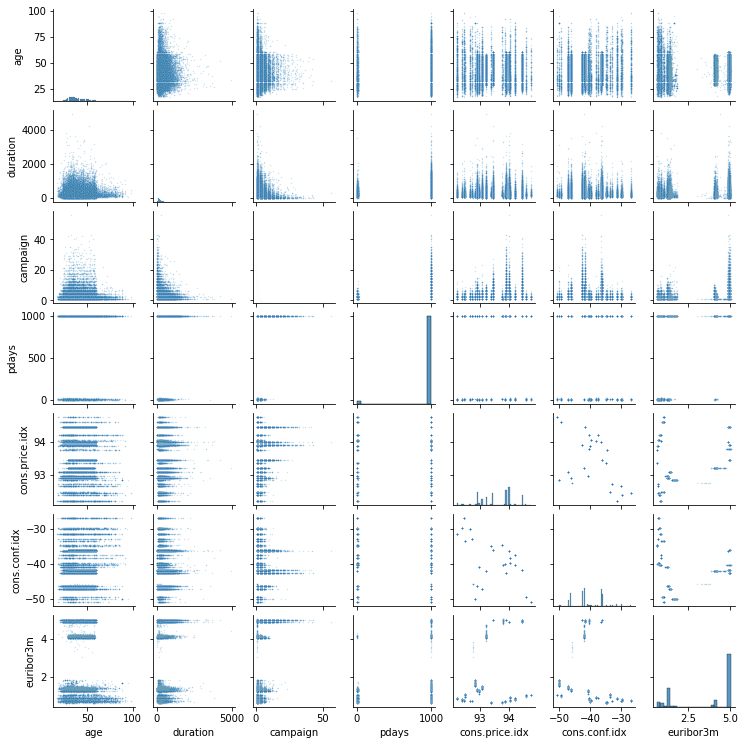

In [15]:
import seaborn as sns
# Creates mask to identify numerical features with more or less than 25 unique features
cols_continuous = data.select_dtypes(include="number").nunique() >= 25
df_continuous = data[cols_continuous[cols_continuous].index]

sns.pairplot(df_continuous, height=1.5, plot_kws={"s": 2, "alpha": 0.2});

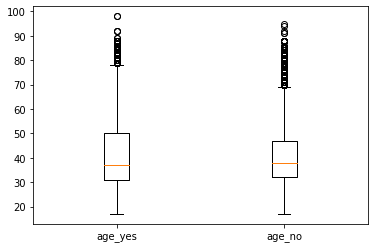

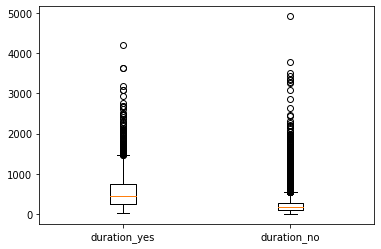

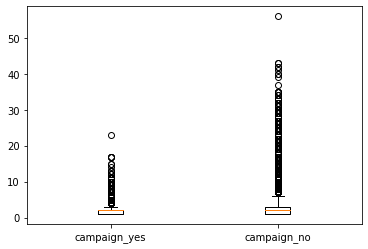

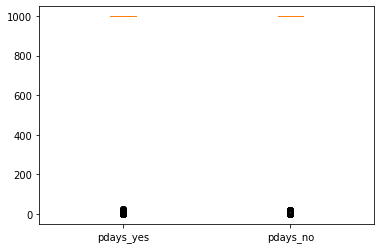

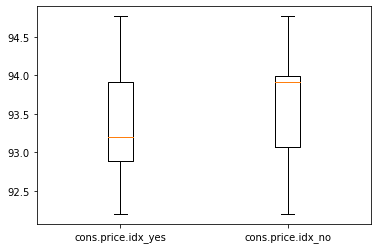

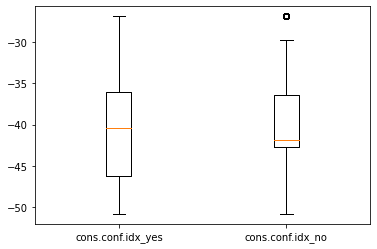

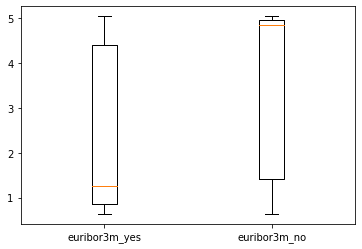

In [16]:
# Loop through features and put each subplot on a matplotlib axis object
for col in df_continuous.columns:
    field_yes = data.loc[np.where(data['y']=='yes')[0], col]
    field_no = data.loc[np.where(data['y']=='no')[0], col]

    d = [field_yes, field_no]
    plt.boxplot(d, labels = [f"{col}_yes", f"{col}_no"])
    plt.show()

# from the plots, duration, consumer price index, and euribor 3 month rate seem very relevant 

In [19]:
# check unique values for each categorical field
cols_continuous = ['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']
df_categorical = data[cols_continuous]

for i in list(df_categorical):
    print(f"unique values for field {i} are: {np.unique(df_categorical[i])}")

unique values for field job are: ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
unique values for field marital are: ['divorced' 'married' 'single' 'unknown']
unique values for field education are: ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
unique values for field default are: ['no' 'unknown' 'yes']
unique values for field housing are: ['no' 'unknown' 'yes']
unique values for field loan are: ['no' 'unknown' 'yes']
unique values for field contact are: ['cellular' 'telephone']
unique values for field month are: ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
unique values for field day_of_week are: ['fri' 'mon' 'thu' 'tue' 'wed']
unique values for field poutcome are: ['failure' 'nonexistent' 'success']


In [20]:
# lets impute missing values (unknwon) -- Python imputation is basic, I prefer to use R's MICE package for more complecated imputations
data = data.replace('unknown', np.nan)
data.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [21]:
# remove two of fields with least variation
data = data.drop(['poutcome', 'pdays'], axis = 1)

# convert categorical values with values
data['job'] = data['job'].replace({'admin.':1, 'blue-collar':2, 'entrepreneur':3, 'housemaid':4, 'management':5, 'retired':6,
 'self-employed':7, 'services':8, 'student':9, 'technician':10, 'unemployed':11})

data['marital'] = data['marital'].replace({'divorced':1, 'married':2, 'single':3})

data['education'] = data['education'].replace({'basic.4y':1, 'basic.6y':2, 'basic.9y':3, 'high.school':4, 'illiterate':5, 'professional.course':6,
 'university.degree':7})

data['default'] = data['default'].replace({'yes':1, 'no':0})
data['housing'] = data['housing'].replace({'yes':1, 'no':0})
data['loan'] = data['loan'].replace({'yes':1, 'no':0})
data['contact'] = data['contact'].replace({'cellular':1, 'telephone':2})

data['month'] = data['month'].replace({'apr':1, 'aug':2, 'dec':3, 'jul':4, 'jun':5, 'mar':6, 'may':7, 'nov':8, 'oct':9, 'sep':10})

data['day_of_week'] = data['day_of_week'].replace({'fri':1, 'mon':2, 'thu':3, 'tue':4, 'wed':5})

data['y'] = data['y'].replace({'yes':1, 'no':0})


In [22]:
# impute missing values using KNN
# the proper way is of-course to divide data into a train and independant test set. Apply imputation on the train set
# and use the transform function to apply on the independant test set for validation purposes
# for the sake of this excersice and for simplicity (given there are not a lot of missing values within the data) I have applied the imputation on all data

# separate the outcome
y = data['y']
data = data.drop(['y'],axis = 1)

impute_fields = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'default', 'housing', 'loan']
impute_data = data[impute_fields]

from sklearn.impute import KNNImputer
impute_data = pd.DataFrame(np.round(KNNImputer(n_neighbors = 3).fit_transform(impute_data)), columns = impute_data.columns)

for i in impute_fields:
    data[i] = impute_data[i]
    
data.isnull().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [23]:
# convert back categories to make life easier for one-hot encoding

# convert categorical values with values
data['job'] = data['job'].replace({1:'admin.', 2:'blue-collar', 3:'entrepreneur', 4:'housemaid', 5:'management', 6:'retired',
 7:'self-employed', 8:'services', 9:'student', 10:'technician', 11:'unemployed'})

data['marital'] = data['marital'].replace({1:'divorced', 2:'married', 3:'single'})

data['education'] = data['education'].replace({1:'basic.4y', 2:'basic.6y', 3:'basic.9y', 4:'high.school', 5:'illiterate', 6:'professional.course',
 7:'university.degree'})

data['contact'] = data['contact'].replace({1:'cellular', 2:'telephone'})

data['month'] = data['month'].replace({1:'apr', 2:'aug', 3:'dec', 4:'jul', 5:'jun', 6:'mar', 7:'may', 8:'nov', 9:'oct', 10:'sep'})

data['day_of_week'] = data['day_of_week'].replace({1:'fri', 2:'mon', 3:'thu', 4:'tue', 5:'wed'})


In [24]:
# dummify the categorical fields
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

fields = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week']
for feature in fields:
    data = encode_and_bind(data, feature)
    


In [25]:
# check the proportion of each field with respect to the overall data
for s in fields:
    lst_fields=[string for string in list(data) if s in string]
    for i in lst_fields:
        print(f"field '{i}' proportion with respect to overall data is: {np.round((sum(data[i])/data.shape[0])*100,2)}%")
    
    print("=======================================================")
    
# observation: fields with <5% variability could potentially create extra unwanted dimensions to the data
# sometimes its a good idea to combine low variation fields -if possible- to reduce data sparsity
# for this data, I will not choose to combine low-count fields as most of them are unrelated

field 'job_admin.' proportion with respect to overall data is: 25.36%
field 'job_blue-collar' proportion with respect to overall data is: 22.57%
field 'job_entrepreneur' proportion with respect to overall data is: 3.62%
field 'job_housemaid' proportion with respect to overall data is: 2.74%
field 'job_management' proportion with respect to overall data is: 7.2%
field 'job_retired' proportion with respect to overall data is: 4.29%
field 'job_self-employed' proportion with respect to overall data is: 3.52%
field 'job_services' proportion with respect to overall data is: 9.68%
field 'job_student' proportion with respect to overall data is: 2.16%
field 'job_technician' proportion with respect to overall data is: 16.4%
field 'job_unemployed' proportion with respect to overall data is: 2.46%
field 'marital_divorced' proportion with respect to overall data is: 11.2%
field 'marital_married' proportion with respect to overall data is: 60.68%
field 'marital_single' proportion with respect to ove

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=45)

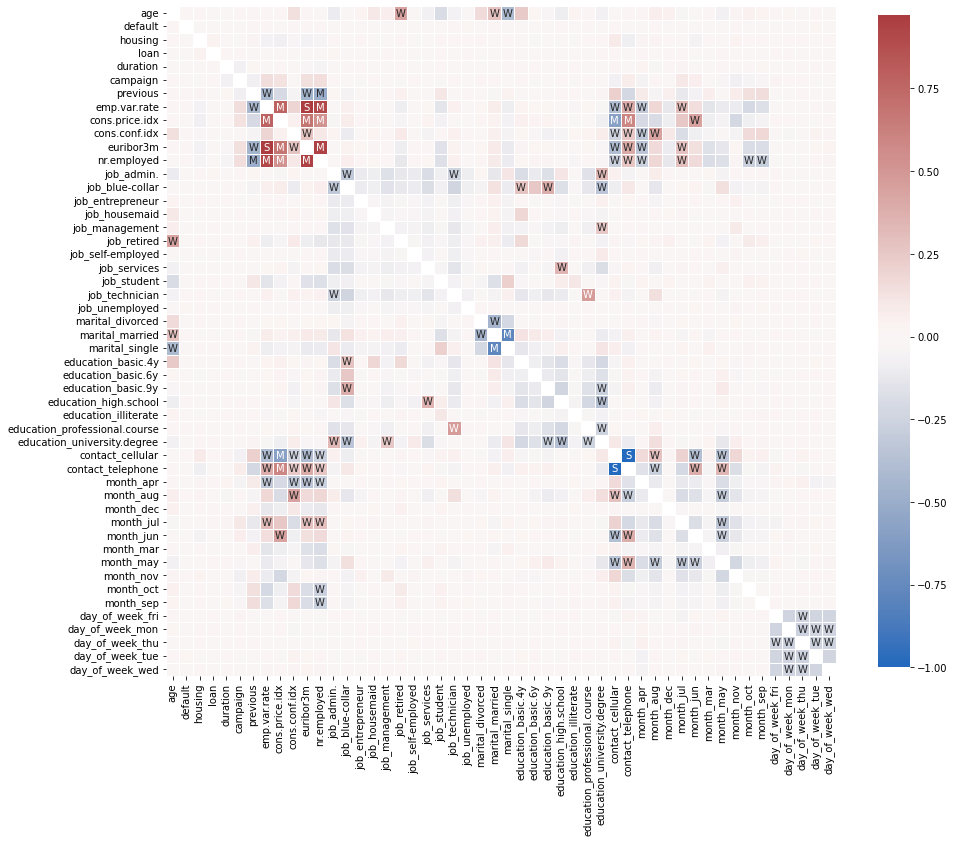

In [27]:
# a final sanity check is to check co-linearity among data
# Create labels for the correlation matrix
df_corr = X_train.corr(method="pearson")
labels = np.where(np.abs(df_corr)>0.95, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [28]:
# normalize train test
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

normalized_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
normalized_X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

train = pd.concat([normalized_X_train,y_train],axis = 1)
test = pd.concat([normalized_X_test,y_test],axis = 1)

In [29]:
list(train)

['age',
 'default',
 'housing',
 'loan',
 'duration',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'y']

In [30]:
from pycaret.classification import *
s = setup(train, target='y')
best = compare_models()
evaluate_model(best)
preds = predict_model(best, data = test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9130,0.9431,0.5322,0.6388,0.5803,0.5323,0.5352,2.8560
lightgbm,Light Gradient Boosting Machine,0.9101,0.9432,0.5301,0.6201,0.5712,0.5214,0.5236,0.3980
rf,Random Forest Classifier,0.9073,0.9326,0.4283,0.6336,0.5109,0.4618,0.4728,1.6710
ada,Ada Boost Classifier,0.9034,0.9337,0.3626,0.6276,0.4587,0.4099,0.4290,0.8510
lr,Logistic Regression,0.9026,0.9206,0.3008,0.6497,0.4107,0.3655,0.3980,1.9130
lda,Linear Discriminant Analysis,0.9014,0.9285,0.5292,0.5696,0.5483,0.4930,0.4937,0.2900
svm,SVM - Linear Kernel,0.8988,0.0000,0.2639,0.6269,0.3643,0.3205,0.3585,0.1880
ridge,Ridge Classifier,0.8986,0.0000,0.2372,0.6371,0.3452,0.3027,0.3467,0.0670
et,Extra Trees Classifier,0.8978,0.9055,0.3385,0.5845,0.4280,0.3762,0.3936,2.3150
dummy,Dummy Classifier,0.8870,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0560


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8984,0.9376,0.7609,0.5345,0.6280,0.5712,0.5831


In [39]:
import shap
explainer = shap.TreeExplainer(best)
shap_values = explainer.shap_values(normalized_X_train)
shap_obj = explainer(normalized_X_train)

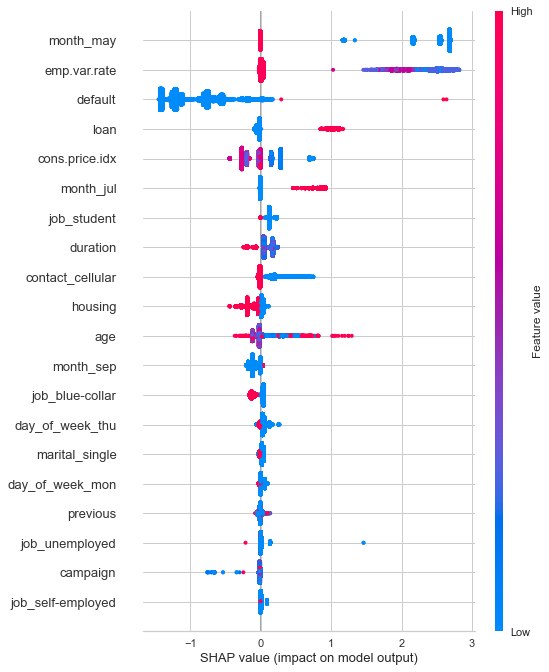

In [48]:
import copy    
shap.summary_plot(copy.deepcopy(shap_values), normalized_X_train)

In [54]:
import keras

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(normalized_X_train.shape), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(normalized_X_train, y_train, epochs=150, batch_size=300)
# evaluate the keras model
_, accuracy = model.evaluate(normalized_X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
97/97 [==============================] - 9s 24ms/step - loss: 0.4674 - accuracy: 0.8417 1s - loss: 0.6374 - accuracy:  - ETA: 1s - loss: 0.6127  - ETA: 1s - loss: 0.5541 - accuracy: 0.80 - ETA: 1s - loss: 0
Epoch 2/150
97/97 [==============================] - 2s 20ms/step - loss: 0.3224 - accuracy: 0.8874 0s - loss: 0.3323 - accuracy: 0.88 - ETA: 0s - loss:
Epoch 3/150
97/97 [==============================] - 2s 24ms/step - loss: 0.2954 - accuracy: 0.8877 0s - loss: 0.2954 - accuracy: 0.
Epoch 4/150
97/97 [==============================] - 2s 23ms/step - loss: 0.2817 - accuracy: 0.8880
Epoch 5/150
97/97 [==============================] - 2s 24ms/step - loss: 0.2740 - accuracy: 0.8891 1s - loss: 0.2783 - accuracy:  - ETA: 1s - los
Epoch 6/150
97/97 [==============================] - 2s 22ms/step - loss: 0.2670 - accuracy: 0.8901 0s - loss: 0.2
Epoch 7/150
97/97 [==============================] - 2s 22ms/step - loss: 0.2611 - accuracy: 0.8915
Epoch 8/150
97/97 [==============

97/97 [==============================] - 2s 21ms/step - loss: 0.1798 - accuracy: 0.9143
Epoch 110/150
97/97 [==============================] - 1s 15ms/step - loss: 0.1800 - accuracy: 0.9148 0s - los
Epoch 111/150
97/97 [==============================] - 1s 13ms/step - loss: 0.1798 - accuracy: 0.9150
Epoch 112/150
97/97 [==============================] - 2s 19ms/step - loss: 0.1796 - accuracy: 0.9149 0s - loss: 0.1785 - accu
Epoch 113/150
97/97 [==============================] - 2s 16ms/step - loss: 0.1799 - accuracy: 0.9153
Epoch 114/150
97/97 [==============================] - 2s 19ms/step - loss: 0.1798 - accuracy: 0.9148
Epoch 115/150
97/97 [==============================] - 2s 19ms/step - loss: 0.1799 - accuracy: 0.9151
Epoch 116/150
97/97 [==============================] - 2s 17ms/step - loss: 0.1798 - accuracy: 0.9153
Epoch 117/150
97/97 [==============================] - 2s 18ms/step - loss: 0.1790 - accuracy: 0.9149 0s - loss: 0.1789 - 
Epoch 118/150
97/97 [====================

In [67]:
from sklearn.metrics import roc_curve
y_pred = model.predict(normalized_X_test).ravel()
fpr_keras, tpr_keras, thresholds = roc_curve(y_test, y_pred)
from sklearn.metrics import auc
auc = auc(fpr_keras, tpr_keras)

print(f"NeuralNets model accuracy on test set is {np.round(accuracy,2)} and AUC is {np.round(auc,2)}.")

NeuralNets model accuracy on test set is 0.89 and AUC is 0.93.
